In [290]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [291]:
data = pd.read_excel('Telco-Customer-Churn.xlsx');
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [292]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [293]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [294]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [295]:
data['gender'].value_counts()


gender
Male      3555
Female    3488
Name: count, dtype: int64

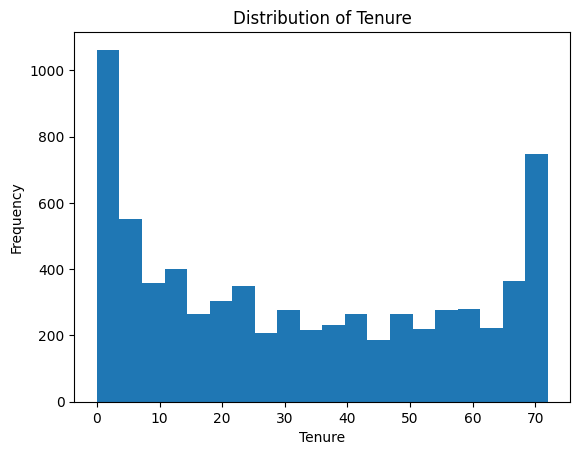

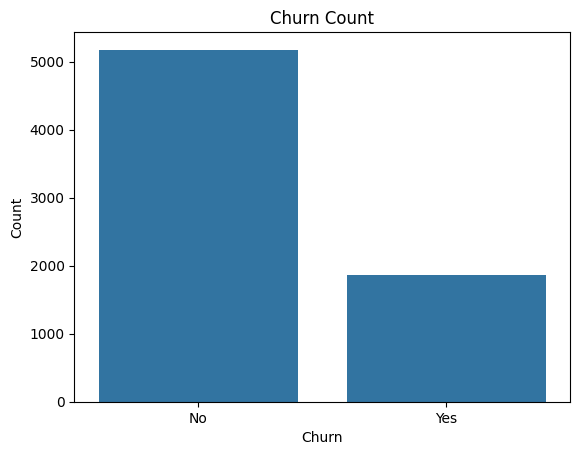

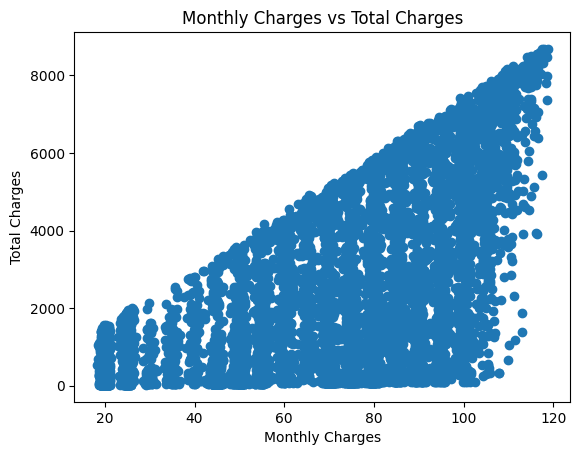

In [296]:
# Histograma de la columna 'tenure'
plt.hist(data['tenure'], bins=20)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

# Diagrama de barras de la columna 'Churn'
sns.countplot(x='Churn', data=data)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count')
plt.show()

# Diagrama de dispersión de 'MonthlyCharges' vs 'TotalCharges'
plt.scatter(data['MonthlyCharges'], data['TotalCharges'])
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Monthly Charges vs Total Charges')
plt.show()


### Limpieza

In [297]:
data =data.dropna()
data= data.drop_duplicates()
customer_id= data['customerID']
data = data.drop(columns=['customerID'])
data_binarizada= pd.get_dummies(data, drop_first=True)
data_binarizada = data_binarizada.astype(int)
data_binarizada

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29,29,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56,1889,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53,108,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42,1840,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84,1990,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7039,0,72,103,7362,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7040,0,11,29,346,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74,306,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


In [298]:
X= data_binarizada.drop(columns=['Churn_Yes'])
y= data_binarizada['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Arbol de desición 

In [299]:
%%time
param_grid={
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,7, None],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10],
    
}

tree= DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=5, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 5.61 s
Wall time: 9.96 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [300]:
best_params= grid_search.best_params_
best_score= grid_search.best_score_
print(f"Mejores hiperparametros ==>\t{best_params}")
print(f"Mejores accuracy ==>\t{best_score}")

Mejores hiperparametros ==>	{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mejores accuracy ==>	0.7948444444444445


In [301]:
y_hat= grid_search.predict(X_test)
report_= classification_report(y_test, y_hat)
print(report_)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1033
           1       0.56      0.55      0.56       374

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.77      0.77      1407



### Regresión Logística

In [302]:
# 1. Definir el modelo
logistic_model = LogisticRegression(max_iter=1000)

# 2. Definir el espacio de búsqueda de hiperparámetros
param_grid_logistic = {
    'C': [0.1, 1, 10, 100],  # Parámetro de regularización
    'penalty': ['l1', 'l2'],  # Tipo de penalización (L1 o L2)
    'solver': ['liblinear', 'saga']  # Algoritmo de optimización
}

# 3. Optimizar los hiperparámetros
grid_search_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid_logistic, cv=5, n_jobs=-1, verbose=2)
grid_search_logistic.fit(X_train, y_train)

# 4. Mostrar los mejores hiperparámetros y la precisión del modelo
print("Mejores hiperparámetros encontrados para el modelo de Regresión Logística:")
print(grid_search_logistic.best_params_)
print("Precisión del modelo en el conjunto de entrenamiento:", grid_search_logistic.best_score_)

# 5. Evaluar el modelo en el conjunto de prueba
best_logistic_model = grid_search_logistic.best_estimator_
test_accuracy_logistic = best_logistic_model.score(X_test, y_test)
print("Precisión del modelo en el conjunto de prueba:", test_accuracy_logistic)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores hiperparámetros encontrados para el modelo de Regresión Logística:
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Precisión del modelo en el conjunto de entrenamiento: 0.8085333333333333
Precisión del modelo en el conjunto de prueba: 0.7874911158493249


### Gradient Boosting

In [303]:
# 1. Definir el modelo
gradient_boosting_model = GradientBoostingClassifier()

# 2. Definir el espacio de búsqueda de hiperparámetros
param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 150],  # Número de árboles en el ensamble
    'learning_rate': [0.01, 0.1, 0.5],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7],  # Profundidad máxima de los árboles base
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
}

# 3. Optimizar los hiperparámetros
grid_search_gradient_boosting = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid_gradient_boosting, cv=5, n_jobs=-1, verbose=2)
grid_search_gradient_boosting.fit(X_train, y_train)

# 4. Mostrar los mejores hiperparámetros y la precisión del modelo
print("Mejores hiperparámetros encontrados para el modelo de Gradient Boosting:")
print(grid_search_gradient_boosting.best_params_)
print("Precisión del modelo en el conjunto de entrenamiento:", grid_search_gradient_boosting.best_score_)

# 5. Evaluar el modelo en el conjunto de prueba
best_gradient_boosting_model = grid_search_gradient_boosting.best_estimator_
test_accuracy_gradient_boosting = best_gradient_boosting_model.score(X_test, y_test)
print("Precisión del modelo en el conjunto de prueba:", test_accuracy_gradient_boosting)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros encontrados para el modelo de Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}
Precisión del modelo en el conjunto de entrenamiento: 0.8037333333333333
Precisión del modelo en el conjunto de prueba: 0.7967306325515281


### Bosque Aleatorio

In [304]:
# 1. Definir el modelo
random_forest_model = RandomForestClassifier()

# 2. Definir el espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas para ser una hoja
    'max_features': [None, 'sqrt', 'log2'],  # Número máximo de características consideradas para dividir un nodo
    'bootstrap': [True, False]  # Método de muestreo de datos para la construcción de árboles
}


# 3. Optimizar los hiperparámetros
grid_search_random_forest = GridSearchCV(estimator=random_forest_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, error_score='raise')
grid_search_random_forest.fit(X_train, y_train)

# 4. Mostrar los mejores hiperparámetros y la precisión del modelo
print("Mejores hiperparámetros encontrados para el modelo de Bosques Aleatorios:")
print(grid_search_random_forest.best_params_)
print("Precisión del modelo en el conjunto de entrenamiento:", grid_search_random_forest.best_score_)

# 5. Evaluar el modelo en el conjunto de prueba
best_random_forest_model = grid_search_random_forest.best_estimator_
test_accuracy_random_forest = best_random_forest_model.score(X_test, y_test)
print("Precisión del modelo en el conjunto de prueba:", test_accuracy_random_forest)



Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Mejores hiperparámetros encontrados para el modelo de Bosques Aleatorios:
{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Precisión del modelo en el conjunto de entrenamiento: 0.8083555555555556
Precisión del modelo en el conjunto de prueba: 0.7967306325515281


### Evaluación

Los modelos muestran valores similares con una precision del 0.809 y 0.79 de acuraccy